# Macomaking - Matchmaking in Fortnite

***Students Name:*** 
 - *Anguiano Suárez del Real, Rafael de Jesús*
 - *Landázuri Pérez, Jorge Darío*
 - *Myung Orozco, Leonardo Jae*
 - *Tórres Guzmán, Cecilia Alexia*
 - *Rodríguez Ocampo, Jonatan Leonardo*


## Summary

We analyzed the dataset of `player` statistics in the game **Fortnite** to do a matchmaking and propose players with similar statistics for a fair duel in different game modes (**1v1, 2v2, 3v3, 4v4** ).

<img src="https://www.powergamingnetwork.com/wp-content/uploads/2021/12/fortnite-audio-3d-mejora.jpg" alt="Fornite" width="400"/>



## 1. Understand the problem and define the objetive of the analysis

This semester we developed a project where we include most of our subjects, opting for a video game matchmaking, because we find that in many video games, the match is really random, which makes games unfair and often develops frustration at the same time. time to play.

We found a dataset of Fortnite player stats and we're looking to make an algorithm that matches one player against others to get fair matches in different game modes.

## 2.Collect Data

We use the dataset from [Fortnite from Kaggle](https://www.kaggle.com/datasets/iyadali/fortnite-players-stats)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

from scipy.spatial import distance

In [2]:
df= pd.read_csv('Fortnite_players_stats.csv', header = 0)
df_clear = df.dropna(axis = 0, how ='any') 
df

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389,4702684,5584,...,75787.0,117967.0,101589.0,170.0,118.0,5.78,26.8,634.0,2682.0,2865.0
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732,4065613,4141,...,117327.0,150439.0,151358.0,229.0,190.0,8.20,18.2,1259.0,8442.0,4206.0
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171,1137279,1390,...,76065.0,86684.0,452136.0,1180.0,818.0,11.12,32.9,3583.0,26726.0,12273.0
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453,5326457,2249,...,6892.0,80016.0,1748407.0,190.0,246.0,2.33,5.4,3539.0,7787.0,33224.0
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245,3692623,5743,...,46068.0,81424.0,556721.0,824.0,600.0,14.99,53.3,1546.0,10826.0,12019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,im bloom,106294,26,2.03,3.5,736,1440,4470,2208424,1551,...,10842.0,25374.0,21840.0,9.0,10.0,3.27,5.3,171.0,530.0,750.0
1431,Twitch kaOzs_,803918,396,3.42,13.2,3001,8911,27375,890900,739,...,12628.0,38133.0,103451.0,75.0,78.0,5.37,13.3,562.0,2616.0,3222.0
1432,slxyher,603939,310,1.69,5.1,6035,9679,20545,432952,442,...,25626.0,67827.0,449563.0,154.0,141.0,4.62,6.2,2497.0,10833.0,13925.0
1433,RD-Antony,747295,71,1.10,1.9,3763,4048,31147,1010165,851,...,15107.0,50447.0,383709.0,8.0,10.0,4.28,0.6,1323.0,5622.0,13315.0


## 3. EDA (Exploratory Data Analysis)

<img src="https://www.researchgate.net/profile/Cristina-Sousa-2/publication/342282008/figure/fig2/AS:903839578353665@1592503556728/Exploratory-Data-Analysis-EDA-steps.png" alt="Image" width="500"/>

### 3.1 Preprocessing Data

In [3]:
report = sv.analyze(df)

file_name = "Fortnite_Stats.html"
o_b = True
report.show_html(file_name, open_browser = o_b)

                                             |                                             | [  0%]   00:00 ->…

Report Fortnite_Stats.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 3.2 Determining Outliers

Function ***plot_boxplot***
>**Complexity: $O(n)$**

In [4]:
## 
## @param {string} feature
## @return {bool}
##

def plot_boxplot(feature):
    fig = plt.figure() # Creating the whiteboard

    # Creating boxplot
    plt.boxplot(df_clear[[
        'Solo ' + feature, 
        'Duos ' + feature, 
        'Trios ' + feature, 
        'Squads ' + feature
    ]])
    
    # Labels and titles
    plt.title(feature + " Comparison")
    plt.xlabel("Game Mode")
    plt.ylabel(feature)
    plt.xticks([1, 2, 3, 4], ['Solo', 'Duos', 'Trios', 'Squads'])
    plt.show()
    
    return True

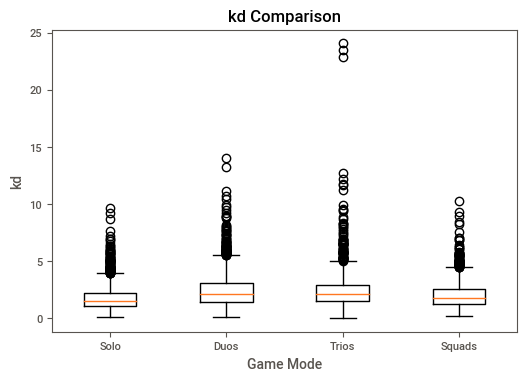

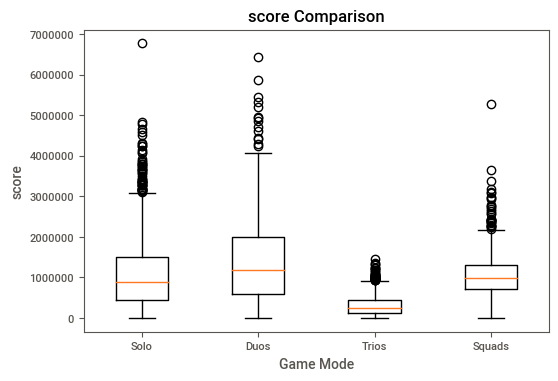

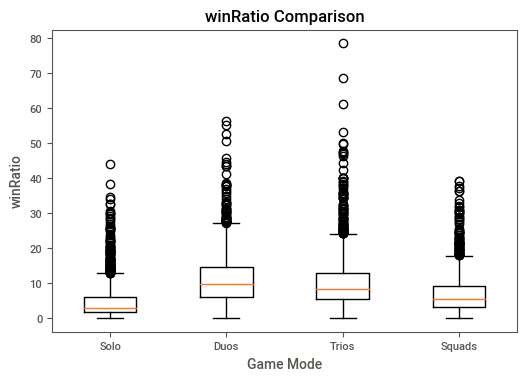

(True, True, True)

In [5]:
# Use the last function to visualize different graphs

plot_boxplot("kd"), plot_boxplot("score"), plot_boxplot("winRatio")

## 4. Feature Engineering

<img src="https://miro.medium.com/max/1400/1*IIzkoFmfkonD50BTQZNU-g.png" alt="Image" width="500"/>

### 4.1 Cleaning DataFrame

>**Complexity: $O(n)$**

In [6]:
# We drop the rows that have an empty value

df_clear = df.dropna(axis = 0, how ='any') 

### 4.2 Scaling Data

>**Complexity: $O(n^2)$**

In [7]:
# Min Max Scaler is used because we do not make a model, it is only an algorithm, therefore we do not use linear 
# regression and we cannot use the StandardScaler

# Import the library
from sklearn.preprocessing import MinMaxScaler

# Get the names of the columns
headers = df_clear.columns

# Scaling the data
temp = MinMaxScaler().fit_transform(df_clear.drop('Player', axis= 1)) # Save the data in a temp variable
temp = pd.DataFrame(data=temp, columns = headers[1::]) # Create the dataframe with the scaling data
temp["Player"] = df_clear["Player"] # Append the column Player
df_complete = temp # Save in df_complete

## 5. Show your Insights

<img src="https://pbs.twimg.com/media/E-PfVElXsAMVoQx.jpg" alt="Image" width="200"/>



## Player Vs Player

Receive two player's names and return who is the winner in a duel, and if the match was fair based on their Kills/Deaths stat.

> **Complexity: $O(n)$**

In [8]:
## 
## @param {string, string} p1, p2
## @return {bool}
##

def OneVsOne(p1, p2):
    # Get the KD value for each player (p1, p2)
    kd1 = df_complete[df_complete['Player'] == p1]['Solo kd'].value_counts().index
    kd2 = df_complete[df_complete['Player'] == p2]['Solo kd'].value_counts().index
    
    # Condition to determine the winner depending for the KD
    result = p1 if kd1 > kd2 else p2
    
    # Condition to determine if the match was fair
    balanced = "Unbalanced" if abs(kd1-kd2) > 3 else "Balanced"
    
    # Print results
    print('RESULT')
    print("Winner: ", result, "\nMatch: ", balanced)
    return True

In [9]:
OneVsOne('Prospеring', 'Raпger')

RESULT
Winner:  Raпger 
Match:  Balanced


True

In [10]:
OneVsOne('Prospеring', '曼巴精神のR6')

RESULT
Winner:  Prospеring 
Match:  Balanced


True

# Matchmaking 

Receives the name of a player and a game mode, and returns players with the closest stats to play with.

Depending on the game mode, it will return a certain amount of players to make a duel.

| Game Mode      | # of Players Returned |
| :---        |    :----:   |
| Solo      | 1       | 
| Duos   | 3        | 
| Trios      | 5       | 
| Squads   | 7        | 

## Pipeline

<img src="./pipeline.jpg" alt="Image" width="100%"/>

Function ***get_players*** 

>**Complexity: $O(n)$**

In [11]:
## 
## @param {string} feature
## @return {[array, string]} [array, p1]
##

def get_players(features, firstPlayer):
    # Get the dataframe of all players with some specific features
    Players = df_complete[features]
    
    # Get the player with some specific features
    p1 = df_complete[df_complete['Player'] == firstPlayer][features]
    
    # Return X and p1
    return [Players, p1]

Function ***euclidean_distance*** 

>**Complexity: $O(n^2)$**

In [12]:
## 
## @param {string, array, integer} p1, X, n
## @return {Dataframe} X.head
##

def euclidean_distance(p1, Players, n):
    # Drop the feature "Player"
    p1 = np.array(p1.drop('Player', axis= 1))
    PlayersClear = np.array(Players.drop('Player', axis= 1))
    
    Distances = [] # Variable to save the distances
    
    #Iterate for each Player
    for p2 in PlayersClear:
        Distances.append(1 - distance.euclidean(p1, p2)) # Calculate the distance
    
    # Adjust the dataframe
    Players.insert(1, "Matching %", Distances) # Add the column of Matching % with the distances
    Players = Players.sort_values(by=['Matching %'], ascending=False) # Sort by Matching %
    Players = Players.drop(0, axis= 0) # Drop the first row, because the first is the same as p1
    return Players.head(n) # Return the fist n records

Function ***Match*** 

>**Complexity: $O(n^2)$**

In [13]:
## 
## @param {string, string} p1, match
## @return {function} compatibility
##

def Match(p1, type_of_match):
    
    # Determine the number of returned players
    if type_of_match == 'Solo': n = 1
    if type_of_match == 'Duos': n = 3
    if type_of_match == 'Trios': n = 5
    if type_of_match == 'Squads': n = 7
    
    # Get the features depending of each type of match
    features = ["Player", type_of_match + " kd", type_of_match + " score", type_of_match + " winRatio"]
    
    # Get the players with the specific features to consider
    [Players, p1] = get_players(features, p1)
    
    # Apply the euclidean distance and return the most nearly players
    return euclidean_distance(p1, Players, n)

In [14]:
Match('Prospеring', 'Solo')

,Player,Matching %,Solo kd,Solo score,Solo winRatio
121,Ruѕh,0.932155,0.491597,0.318575,0.380952


In [15]:
Match('Prospеring', 'Duos')

,Player,Matching %,Duos kd,Duos score,Duos winRatio
4,Twitch.GryphonRB,0.817879,0.793822,0.573096,0.900356
533,Je2Any Bruce Lee,0.757571,0.695402,0.533648,0.937722
352,unikornpiss,0.748936,0.636494,0.578789,0.658363


In [16]:
Match('Prospеring', 'Trios')

,Player,Matching %,Trios kd,Trios score,Trios winRatio
58,Code ShogunOCE,0.973436,0.285418,0.224445,0.379618
77,TheNewbiieTTV,0.941933,0.218945,0.204725,0.388535
1323,尊 ragisさん,0.938423,0.310345,0.170145,0.361783
1361,ItsLimitless,0.931699,0.235563,0.204403,0.342675
179,AUS_SWAGG,0.928360,0.342335,0.232252,0.385987


In [17]:
Match('Prospеring', 'Squads')

,Player,Matching %,Squads kd,Squads score,Squads winRatio
4,Twitch.GryphonRB,0.791141,0.735849,0.529666,0.921120
2,Raпger,0.770822,0.817279,0.520188,0.837150
26,SMS Efesto96,0.752477,0.677259,0.460223,0.715013
339,CSE Talmo,0.667386,0.619662,0.423349,1.000000
620,Bіxby,0.663967,0.580933,0.369336,0.753181
54,Woina derRentner,0.603206,0.424032,0.431052,0.628499
494,CrAzZy GiRLツ,0.597834,0.675273,0.287918,0.814249
